In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

## 1. Importe un csv desde internet
Utilice la base de datos de un compañero creada en la sesión pasada.


In [2]:
df = pd.read_csv('subsample_fsf_demo.csv')

df.head(5)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod
0,73,0.623,HND,2,3303.1399,NaN,19.4,2.87,18.900000,8.722680,LatAm
1,100,0.846,LTU,1,17559.7500,2.932,4.4,15.19,30.100000,6.552117,EastEurope
2,176,0.723,TUN,3,6912.2798,NaN,13.8,1.39,NaN,7.003858,NorthAfrica
3,10,0.790,BHS,10,21672.0290,0.356,NaN,9.45,NaN,7.742365,Caribean
4,67,0.865,GRC,5,25295.2700,10.927,4.1,7.53,43.400002,8.084267,WesternDem


## 2. Importe su conjunto de funciones

1. Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la sesión pasada e impórtelo.
2. Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.


In [3]:
from ancilliary_funcs import lost_data

## 3. Estime el puntaje Z
Estime el puntaze Z para las 10 primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos

1. Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: .
2. Para ordenar los valores pueden utilzar la función sort_values del DataFrame analizado. Lean la documentación asociada al argumento by . Para evitar conflictos en la sobreescritura
3. Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna . Lean la documentación asociada al método subset .
4. Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

**Por el lado de las desviaciones positivas, el dato mas lejano supera las 3 desviaciones estandar por lo que hay evidencia para sugerir datos extremos a un alto porcentaje de confianza**

**Por el otro lado, los datos que estan a mayor distancia de la media no supera 1 desviaciones estandard de la media. 
No hay sospechas de que hay datos extremos, o que la variable undp_hdi no corresponde a variables aleatorias i.i.d.**

In [13]:
df['z'] = .0

df['z'] = (df['gle_cgdpc']-df['gle_cgdpc'].mean())/df['gle_cgdpc'].std()
#df_sorted = df.sort_values(by = 'z',ascending = False)
df_sorted = df_sorted.dropna(subset = ['gle_cgdpc'])
df_sorted.tail()



,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod,z,z_score
33,139,0.421,GNB,4,961.26001,NaN,NaN,3.57,NaN,5.593137,SubSaharian,-1.802041,-0.839666
77,55,0.418,ERI,4,1007.28000,NaN,NaN,0.62,NaN,3.338293,SubSaharian,-1.822009,-0.836083
91,26,0.406,BDI,4,663.57001,NaN,66.900002,4.16,NaN,7.535565,SubSaharian,-1.901882,-0.862844
30,187,0.399,BFA,4,1095.96000,16.5,65.800003,4.64,19.1,4.960263,SubSaharian,-1.948474,-0.829179
63,32,0.347,CAF,4,690.03998,NaN,NaN,1.66,NaN,4.200222,SubSaharian,-2.294586,-0.860784


## 4. Estime el puntaje z de las regiones
Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar
una opción al argumento statistic para calcular el puntaje z.


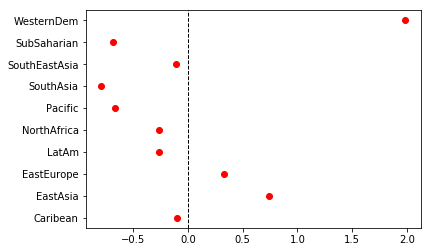

<Figure size 1440x720 with 0 Axes>

In [9]:
def dot_plot_modificada(data,var,plot_by,global_stat=False,statistic='mean'):
    if(statistic == 'mean'):
        temp = data.groupby(plot_by).mean()[var]
        plt.plot(temp.values,temp.index,'ro')
    elif(statistic == 'median'):
        temp = data.groupby(plot_by).median()[var]
        plt.plot(temp.values,temp.index,'ro')
    elif(statistic == 'zscore'):
        data['z_score'] = (data[var]-data[var].mean())/data[var].std()
        temp = data.groupby(plot_by).mean()['z_score']
        plt.plot(temp.values,temp.index,'ro')
        plt.axvline(data['z_score'].mean(), color='k', linestyle='dashed', linewidth=1)
    if(global_stat):
        plt.axvline(df[var].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.figure(figsize=(20,10))
    plt.show()
        
dot_plot_modificada(df_sorted,'gle_cgdpc','region_recod',False,'zscore')

## 5. Genere un método que devuelva un gráfico comparando dos curvas de densidad
1. El método debe contener los siguientes argumentos:
    df1 : Tabla de datos 1.
    df2 : Tabla de datos 2.
    variable : Variable a contrastar.
    log : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False .
2. Grafique las curvas para imf_pop , gle_cgdpc y undp_hdi . ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?

    **Se aplica log normalizacion a las variables imf_pop , gle_cgdpc debido a que por inspeccion grafica tienen comportamientos asintoticos.**

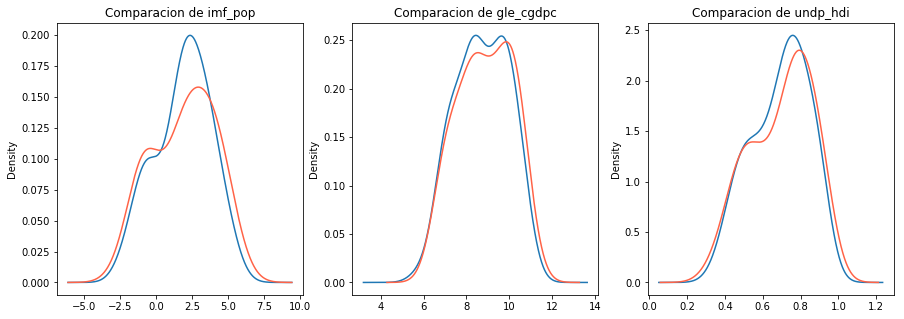

In [7]:
df_sorted_simulated = df_sorted.sample(frac = 0.5)

def compare_graphs(df1,df2,variable,log=False):  
     plt.title("Comparacion de " + variable)
     if log:   
         np.log(df1[variable] + 0.001) .plot(kind='density')
         np.log(df2[variable] + 0.001).plot(kind='density', color='tomato')
     else:
         df1[variable].plot(kind='density')
         df2[variable].plot(kind='density', color='tomato')    

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)    
compare_graphs(df_sorted,df_sorted_simulated,'imf_pop',True)
plt.subplot(1,3,2) 
compare_graphs(df_sorted,df_sorted_simulated,'gle_cgdpc',True)
plt.subplot(1,3,3) 
compare_graphs(df_sorted,df_sorted_simulated,'undp_hdi',False)

